In [143]:
pip install calmap

Note: you may need to restart the kernel to use updated packages.


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
#from ydata_profiling import ProfileReport

In [147]:
df = pd.read_csv('supermarket_sales.csv')

In [149]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# 1. Intial Data Exploration & Quality Check

In [ ]:
I began by exploring the CSV file to understand its structure. This included identifying the available columns, examining the data types,
and reviewing the overall dataset to get a sense of the kind of information it contains.

In [11]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2019-01-05 to 2019-02-18
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross 

In [108]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Total Sales                0
dtype: int64

In [110]:
df.duplicated().sum()

0

In [13]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [19]:
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [21]:
df.set_index('Date', inplace=True)

In [23]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


# 2. Total Sales Calculation

In [153]:
total_sales = df['Total'].sum()
print(total_sales)

322966.749


# 3. Product Sales Analysis

<Axes: xlabel='Product line', ylabel='Count'>

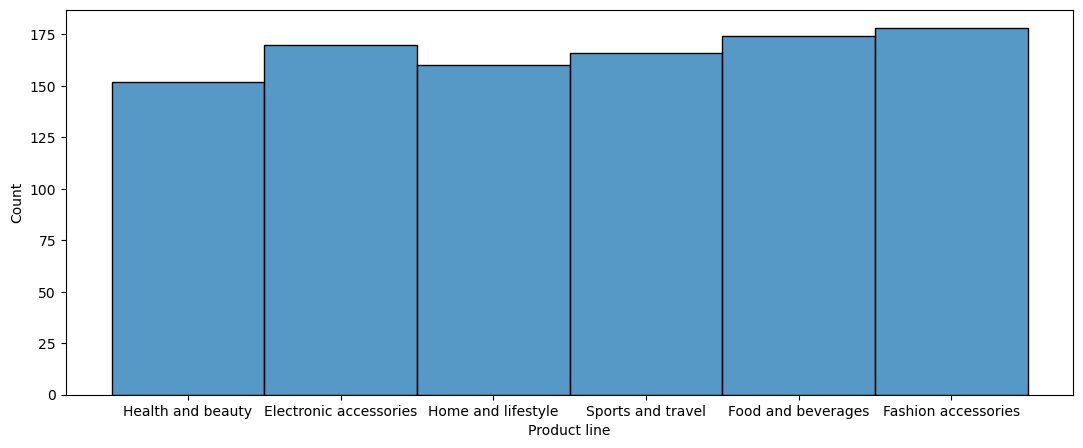

In [175]:
plt.figure(figsize=(13, 5))
sns.histplot(x=df['Product line'])

# 4. Customer Behavior Analysis

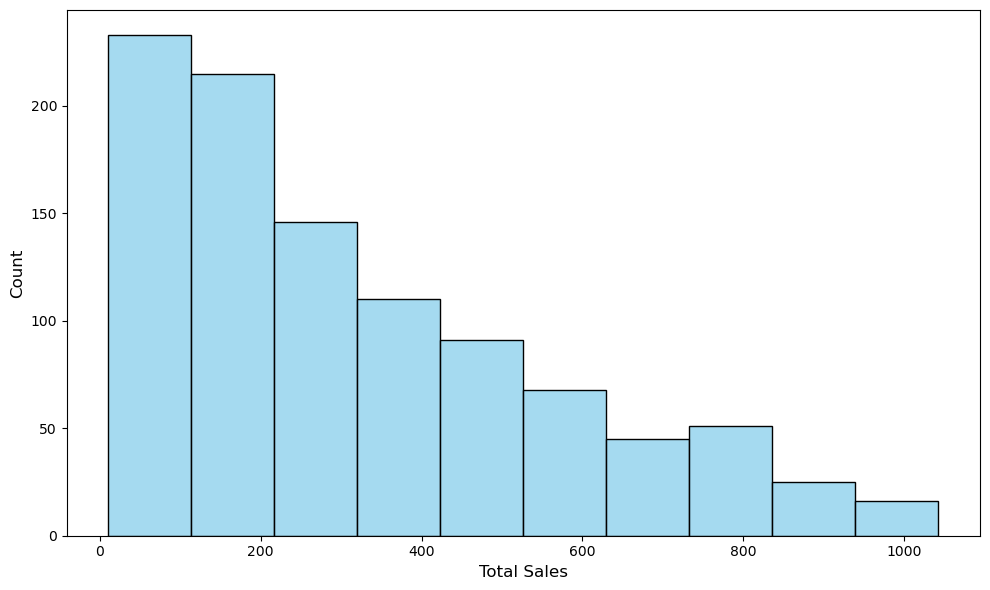

In [185]:
plt.figure(figsize=(10, 6))
sns.histplot(df.groupby('Invoice ID')['Total'].sum(), bins=10, color='skyblue')
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# 5. Store Performance Analysis

<Axes: xlabel='Branch'>

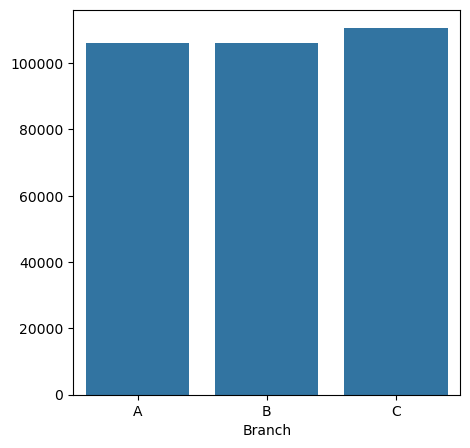

In [202]:
plt.figure(figsize=(5, 5))
sales_per_branch = df.groupby('Branch')['Total'].sum()
sns.barplot(x=sales_per_branch.index, y=sales_per_branch.values)

# 6. Time-Based Sales Trends

<Axes: xlabel='Date'>

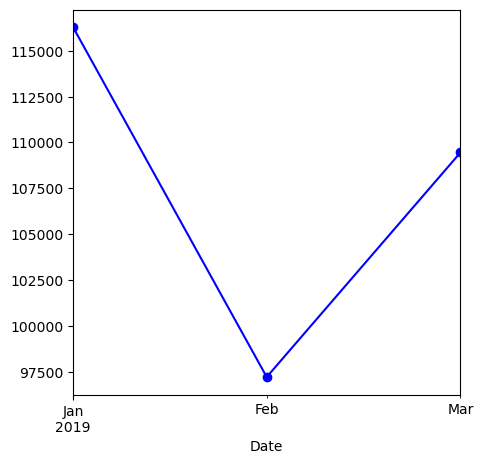

In [233]:
# Group by month and calculate total sales per month
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total'].sum()

# Plotting
plt.figure(figsize=(5, 5))
monthly_sales.plot(kind='line', marker='o', color='b')


### Customer Behaviour
#### 1. Rating Distribution

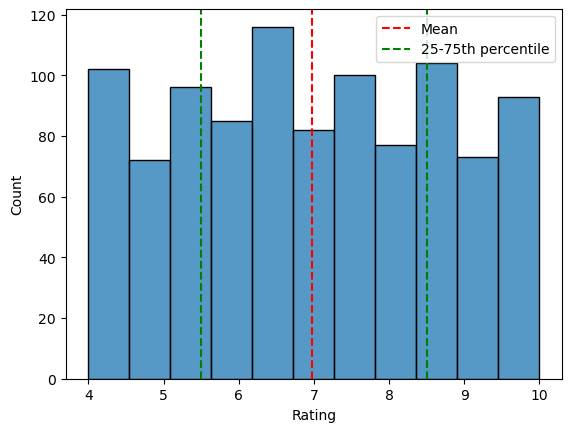

In [57]:
sns.histplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c="red", ls='--', label='Mean')
plt.axvline(x=np.percentile(df['Rating'], 25), c="green", ls='--', label='25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'], 75), c="green", ls='--')
plt.legend()

#### 2. Payment Methods

<Axes: xlabel='Payment', ylabel='count'>

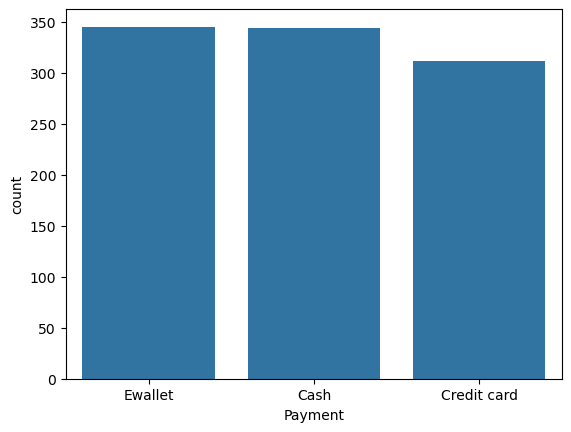

In [75]:
sns.countplot(x=df['Payment'])

In [82]:
df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

#### 3. Customer Type

<Axes: xlabel='Customer type', ylabel='count'>

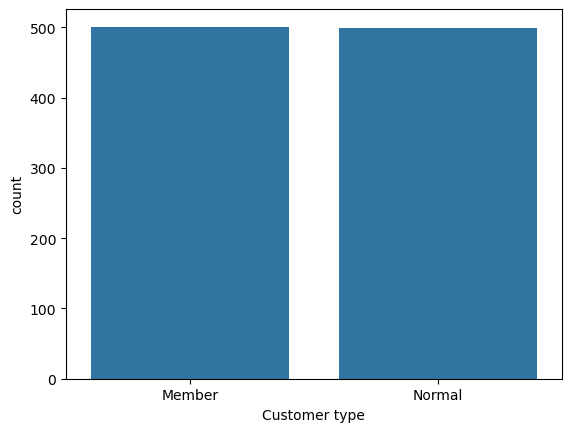

In [88]:
sns.countplot(x=df['Customer type'])